In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Giới thiệu <a id=1></a>

#### 1.1 Giới thiệu <a id=2></a>
Bộ dữ liệu này ban đầu đến từ Viện Quốc gia về Bệnh tiểu đường, Tiêu hóa và Thận. Mục tiêu của bộ dữ liệu là dự đoán bệnh nhân có bị tiểu đường hay không, dựa trên một số phép đo chẩn đoán có trong bộ dữ liệu.

#### 1.2 Các thuộc tính <a id=3></a>
Pregnancies - Số lần mang thai

Glucose - Nồng độ glucose huyết tương

BloodPressure - Huyết áp tâm trương (mm Hg)

SkinThickness` - Độ dày nếp gấp da cơ tam đầu (mm)

Insulin - Insulin huyết thanh 2 giờ (mu U/ml)

BMI - Chỉ số khối cơ thể

DiabetesPedigreeFunction` - Chức năng phả hệ bệnh tiểu đường

Age - Tuổi (năm)

Outcome - Biến mục tiêu (0 hoặc 1)

### 2. Chuẩn bị <a id=5></a>

#### 2.1 Import các thư viện cần thiết <a id=6></a>

In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install scikit-learn -U

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
from termcolor import colored
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Diabetes_Prediction/diabetes.csv')

##### 2.2 Kích thước của bộ dữ liệu

In [ ]:
print(f"Kích thước của bộ dữ liệu: {colored(df.shape)}")


Kích thước của bộ dữ liệu: (768, 9)


##### 2.3 Hiển thị 5 dòng đầu tiên

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### 2.3.1:: Đổi tên DiabetesPedigreeFunction

In [ ]:
df = df.rename(columns = {'DiabetesPedigreeFunction':'DPF'})

##### 2.3.2 Kiểm tra số lượng giá trị duy nhất trong mỗi cột




In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DPF,517
Age,52
Outcome,2


##### 2.3.3 Phân chia  các biến đặc trưng  và biến mục tiêu

In [ ]:
cols = list(df.drop('Outcome',axis=1).columns)
target = ['Outcome']
print(f"The columns are : {colored(cols, 'yellow')}")
print(f"The target is   : {colored(target,'yellow')}")

The columns are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']
The target is   : ['Outcome']


##### 2.3.4 Thống kê mô tả bộ dữ liệu

In [ ]:
df[cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


##### 2.3.5 Kiểm tra giá trị bị thiếu


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DPF,0
Age,0
Outcome,0


### 3. Exploratory Data Analysis <a id=9></a>

#### 3.1 Phân tích đơn biến <a id=10></a>

##### 3.1.1 Đếm số lượng biến mục tiêu

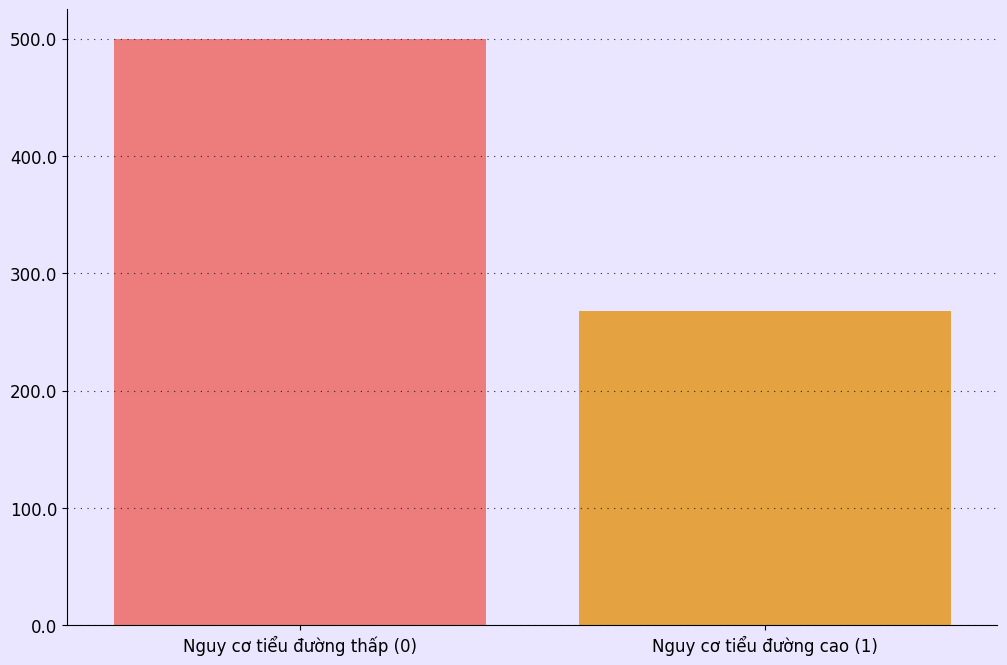

In [ ]:
# Thiết lập kích thước và cấu trúc của biểu đồ chỉ với ax1
fig, ax1 = plt.subplots(figsize=(12, 8))

background_color = "#eae6ff"
color_palette = ["#ff6b6b", "#ffa726", "#1e272e", "#546de5", "#f7d794"]

# Đặt màu nền cho biểu đồ
fig.patch.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Đếm số lượng mục tiêu và vẽ biểu đồ
ax1.grid(color='#1e272e', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.countplot(ax=ax1, data=df, x='Outcome', palette=color_palette)

# Cấu hình nhãn x, y
ax1.set_xticklabels(["Nguy cơ tiểu đường thấp (0)", "Nguy cơ tiểu đường cao (1)"], fontsize=12)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=12)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Ẩn các khung viền
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

plt.show()



##### 3.1.2 Trực quan bằng biểu đồ Boxplot

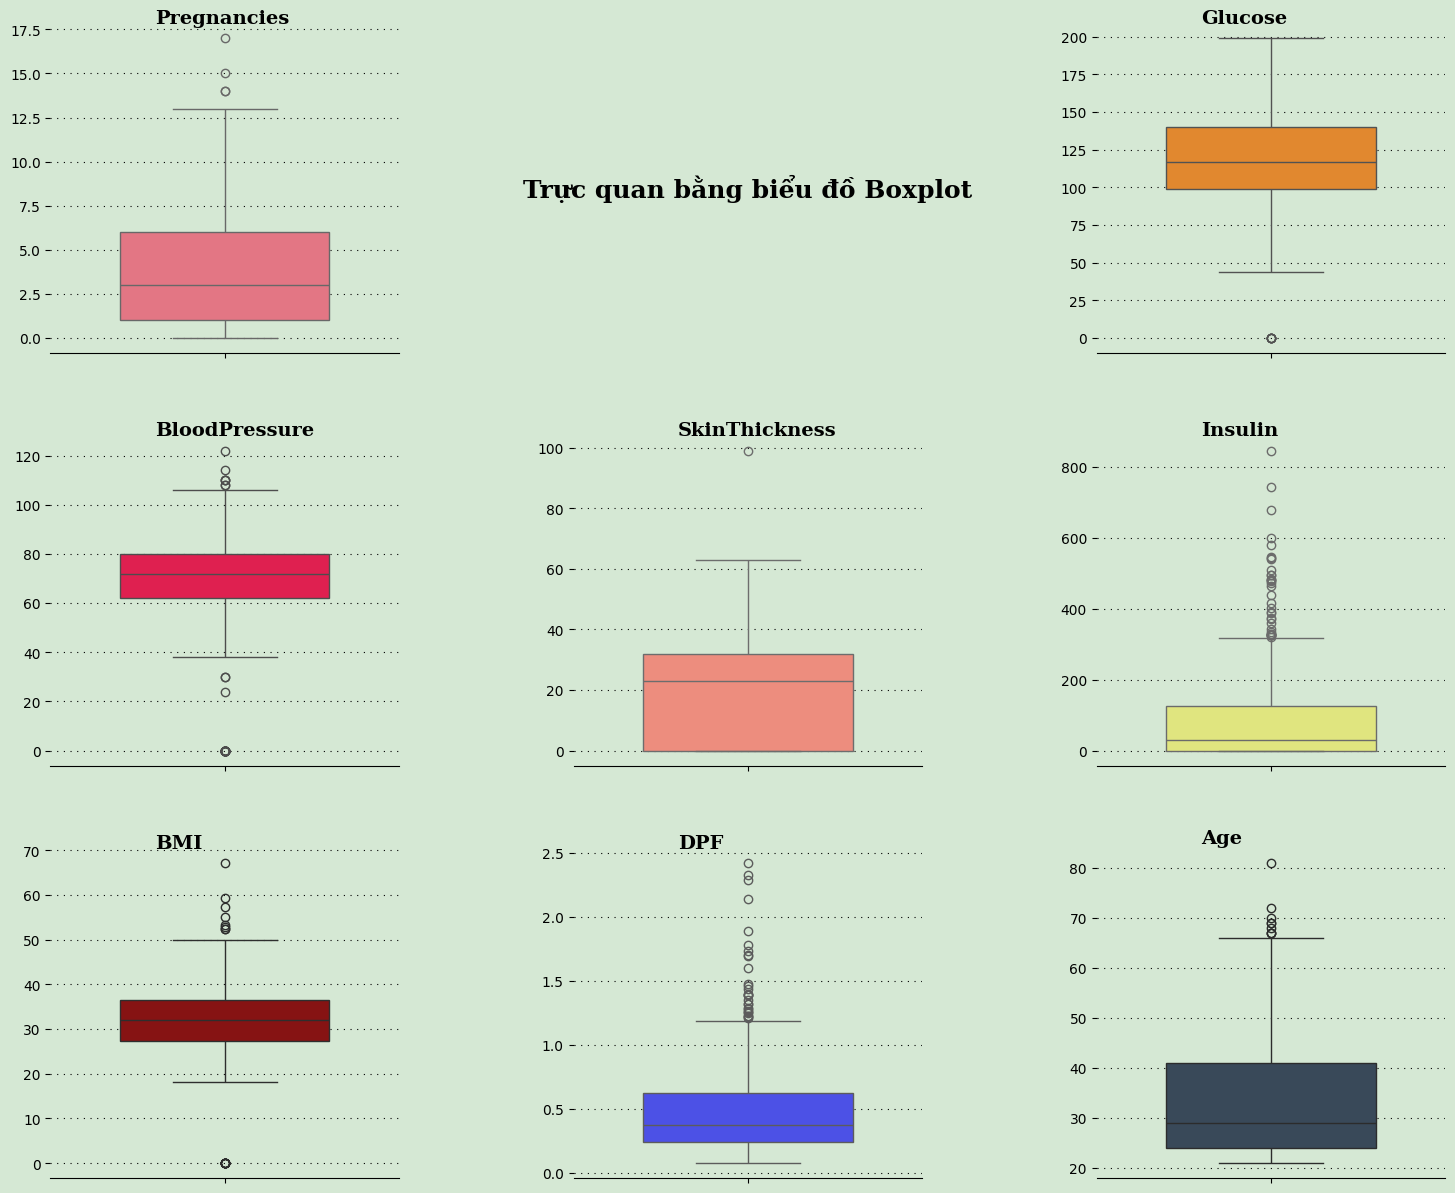

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kích thước và cấu trúc của biểu đồ
fig, axes = plt.subplots(3, 3, figsize=(18, 15), gridspec_kw={'wspace': 0.5, 'hspace': 0.25})

# Các thiết lập màu sắc
background_color = "#d5e8d4"
color_palette = ["#f56476", "#ff8811", "#ff0040", "#ff7f6c", "#f0f66e", "#990000", "#3339FF", "#34495E"]
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']
titles = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']

# Đặt màu nền cho toàn bộ biểu đồ
fig.patch.set_facecolor(background_color)
for ax in axes.flat:
    ax.set_facecolor(background_color)

# Vẽ biểu đồ cho "Pregnancies" ở ô đầu tiên
sns.boxplot(ax=axes[0, 0], y=df['Pregnancies'], palette=[color_palette[0]], width=0.6)
axes[0, 0].text(-0.2, df['Pregnancies'].max() * 1.05, 'Pregnancies', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axes[0, 0].grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("")
axes[0, 0].spines["top"].set_visible(False)
axes[0, 0].spines["right"].set_visible(False)
axes[0, 0].spines["left"].set_visible(False)

# Tạo tiêu đề cho biểu đồ
axes[0, 1].text(0.5, 0.5, 'Trực quan bằng biểu đồ Boxplot',
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=18, fontweight='bold', fontfamily='serif', color="#000000")
axes[0, 1].axis('off')  # Ẩn ô tiêu đề

# Vòng lặp qua từng ô biểu đồ còn lại
for i, ax in enumerate(axes.flat[1:], start=1):  # Bắt đầu từ ô thứ 2
    if i == 1:  # Bỏ qua ô đầu tiên đã được sử dụng cho "Pregnancies"
        continue
    ax.text(-0.2, df[columns[i - 1]].max() * 1.05, titles[i - 1], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))

    # Vẽ boxplot cho các cột còn lại
    sns.boxplot(ax=ax, y=df[columns[i - 1]], palette=[color_palette[i - 1]], width=0.6)

    # Xóa nhãn trục
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Ẩn các khung viền
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

# Hiển thị biểu đồ
plt.show()


##### 3.1.3 Sử dụng Histogram

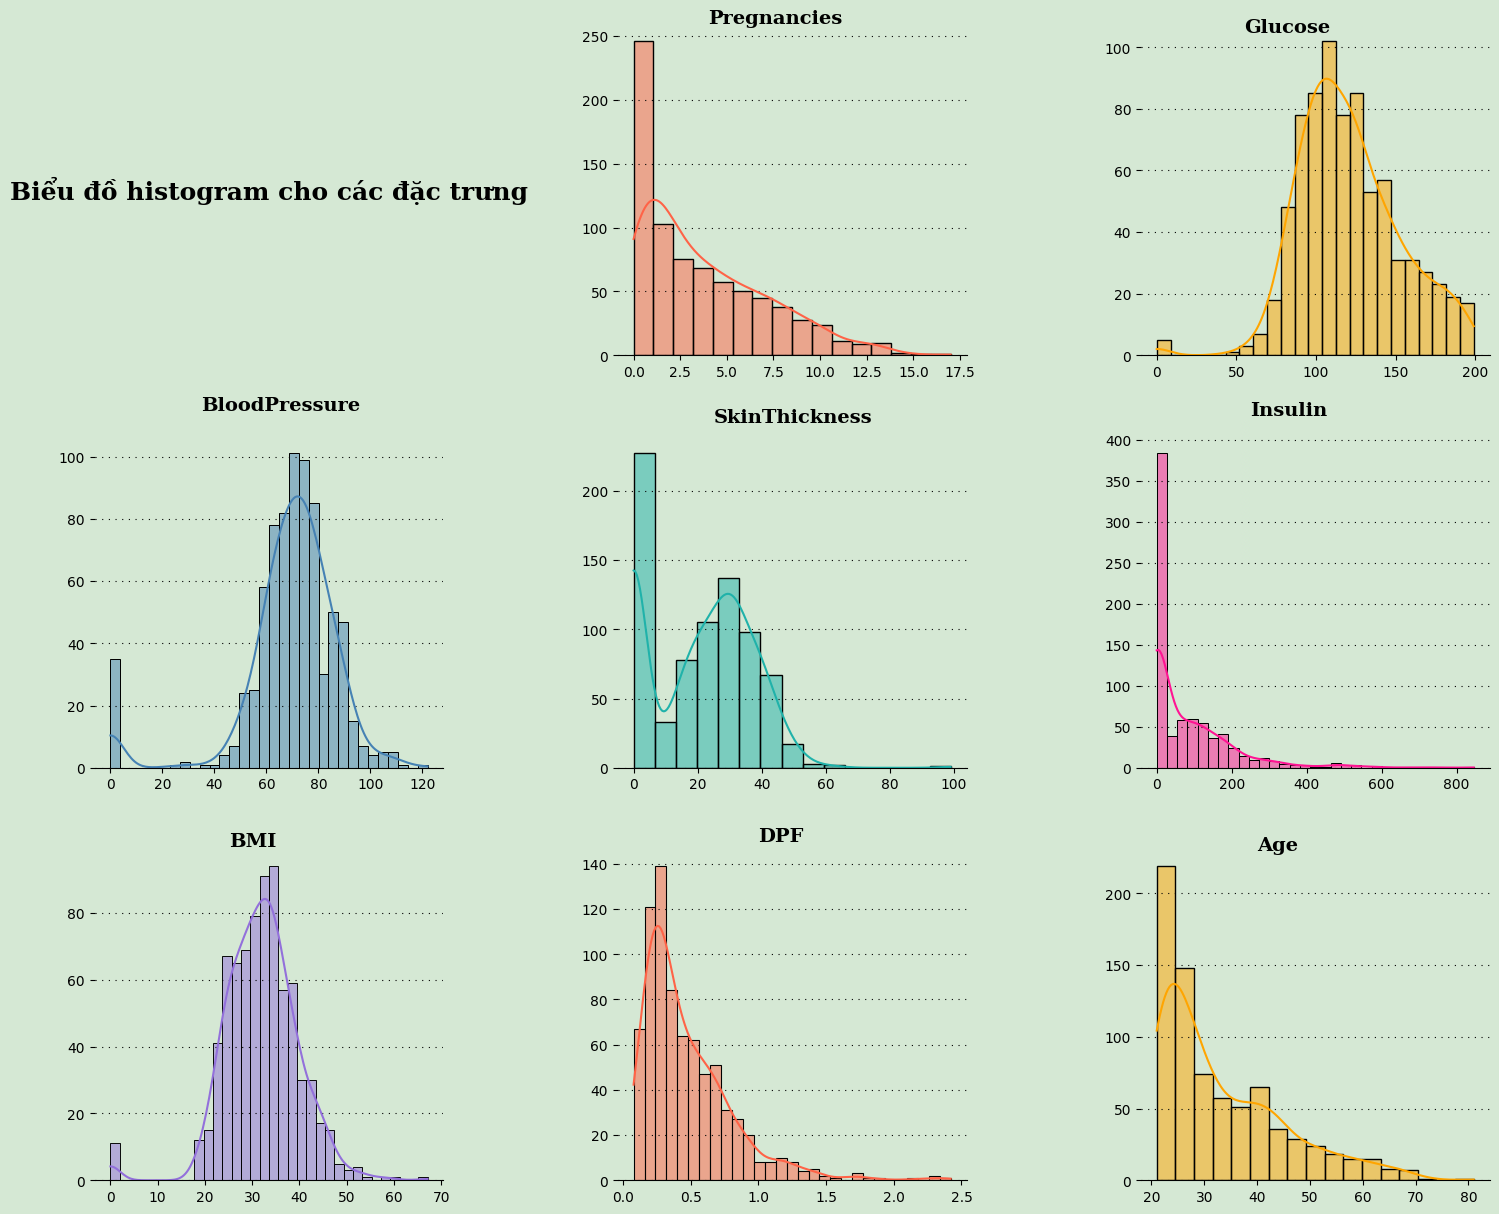

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(18, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

# Màu nền và màu cho các biểu đồ
background_color = "#d5e8d4"
color_palette = ["#FF6347", "#FFA500", "#4682B4", "#20B2AA", "#FF1493", "#9370DB"]
fig.patch.set_facecolor(background_color)

# Đặt màu nền cho các ô biểu đồ
for ax in [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.set_facecolor(background_color)

# Tiêu đề của biểu đồ
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5,
         'Biểu đồ histogram cho các đặc trưng',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Pregnancies
ax1.text(4, 260, 'Pregnancies', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.histplot(ax=ax1, x=df['Pregnancies'], color=color_palette[0], kde=True)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose
ax2.text(55, 105, 'Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.histplot(ax=ax2, x=df['Glucose'], color=color_palette[1], kde=True)
ax2.set_xlabel("")
ax2.set_ylabel("")

# BloodPressure
ax3.text(35, 115, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.histplot(ax=ax3, x=df['BloodPressure'], color=color_palette[2], kde=True)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SkinThickness
ax4.text(25, 250, 'SkinThickness', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.histplot(ax=ax4, x=df['SkinThickness'], color=color_palette[3], kde=True)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Insulin
ax5.text(250, 430, 'Insulin', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.histplot(ax=ax5, x=df['Insulin'], color=color_palette[4], kde=True)
ax5.set_xlabel("")
ax5.set_ylabel("")

# BMI
ax6.text(25, 100, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.histplot(ax=ax6, x=df['BMI'], color=color_palette[5], kde=True)
ax6.set_xlabel("")
ax6.set_ylabel("")

# DPF
ax7.text(1, 150, 'DPF', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.histplot(ax=ax7, x=df['DPF'], color=color_palette[0], kde=True)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Age
ax8.text(40, 230, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.histplot(ax=ax8, x=df['Age'], color=color_palette[1], kde=True)
ax8.set_xlabel("")
ax8.set_ylabel("")

# Ẩn các khung viền không cần thiết
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

plt.show()


#### 3.2 Phân tích hai biến <a id=11></a>

##### 3.2.1 Sử dụng ma trận tương quan để thể hiện mối tương quan giữa các đặc trưng

In [ ]:
df_corr = df.corr().transpose()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


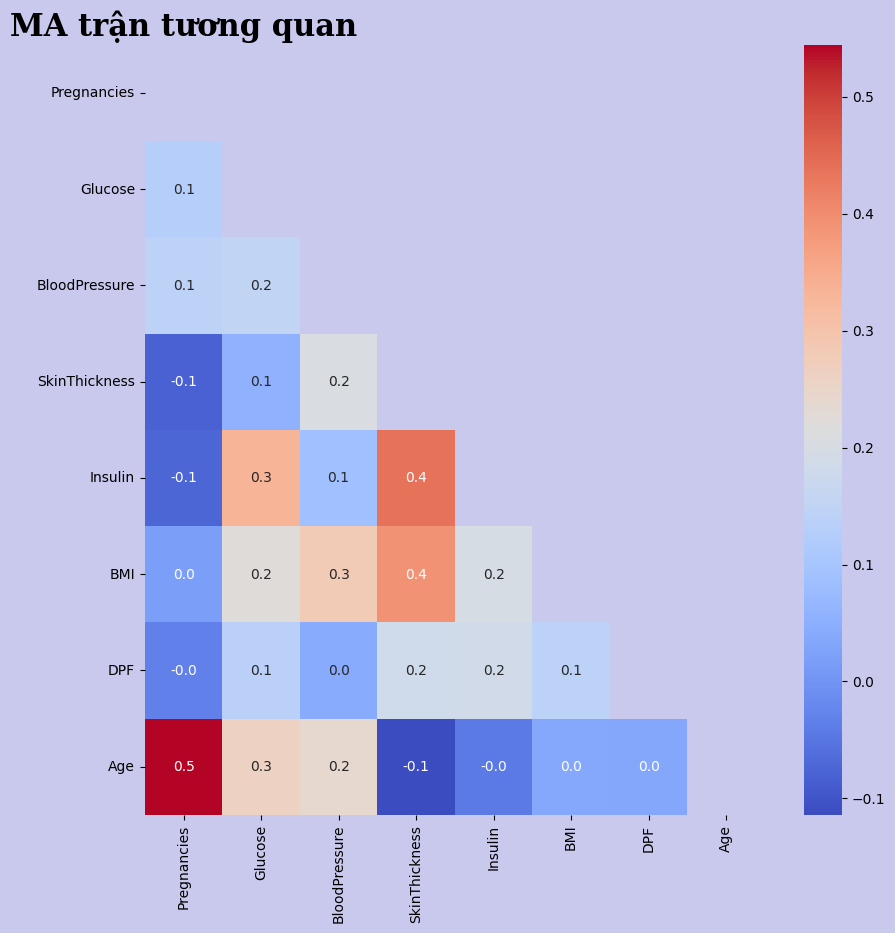

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

background_color = "#c9c9ee"

fig, ax = plt.subplots(figsize=(10, 10), facecolor=background_color)
ax.set_facecolor(background_color)

# Tính toán ma trận tương quan
df_corr = df[cols].corr().transpose()

# Tạo mặt nạ cho ma trận tương quan
mask = np.triu(np.ones_like(df_corr, dtype=bool))

ax.text(0.5, -0.1, "MA trận tương quan", fontsize=22, fontweight='bold', fontfamily='serif', color="#000000", ha='center')

sns.heatmap(df_corr, mask=mask, fmt=".1f", annot=True, cmap="coolwarm", cbar=True, ax=ax)

plt.show()


##### 3.2.2 Trực quan sự phân bố các tính năng theo biến mục tiêu

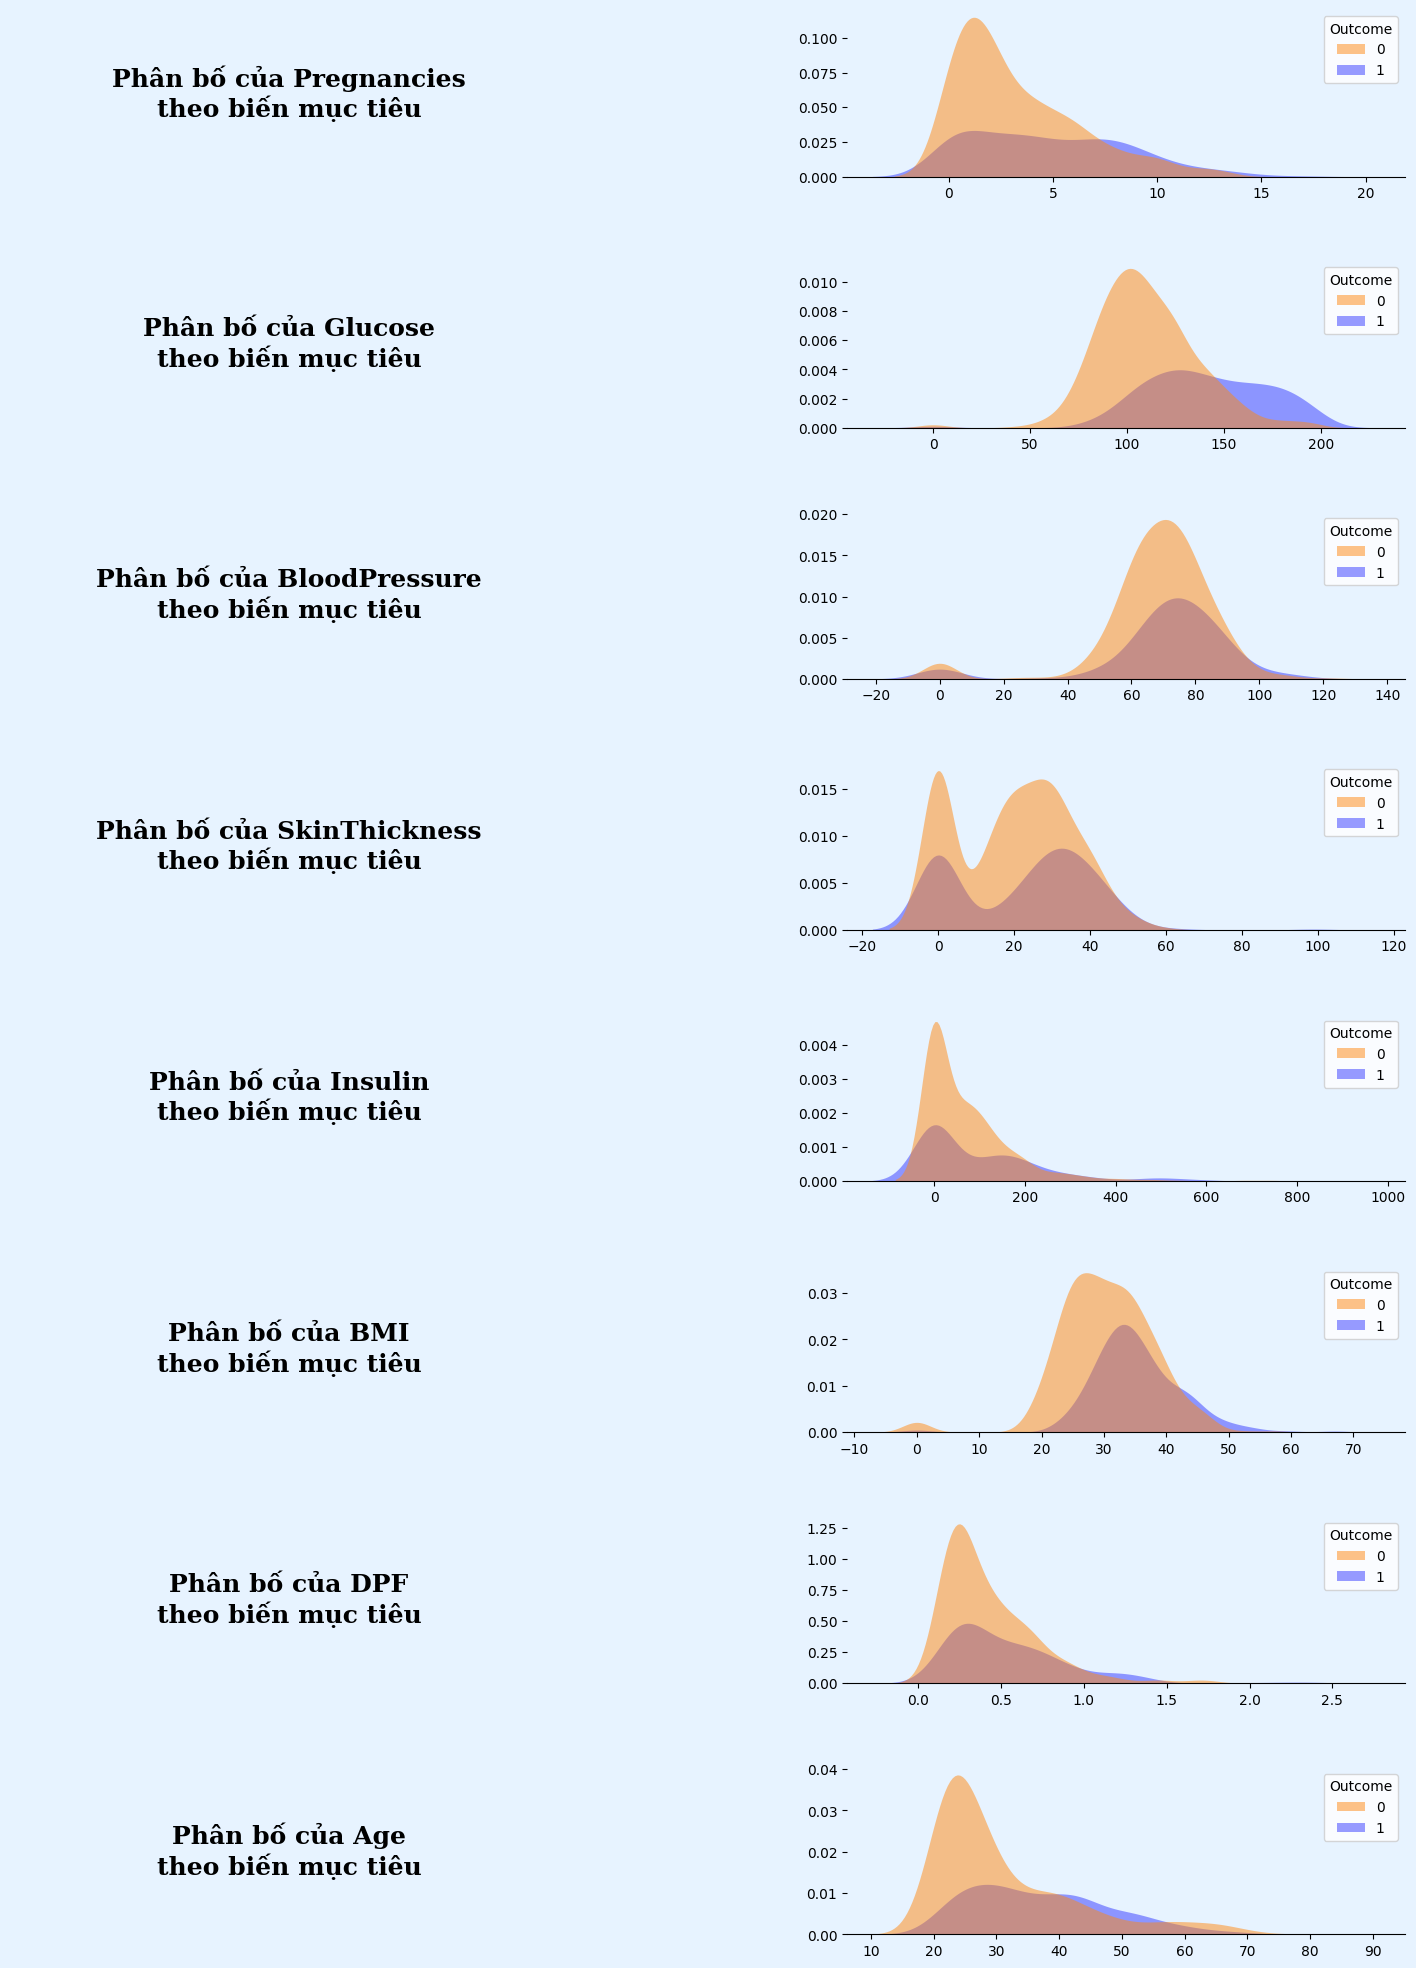

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo hình và lưới con cho các biểu đồ
fig = plt.figure(figsize=(18, 25))
gs = fig.add_gridspec(8, 2)
gs.update(wspace=0.5, hspace=0.5)

# Tạo các trục cho biểu đồ
axes = [fig.add_subplot(gs[i, j]) for i in range(8) for j in range(2)]

# Đặt màu nền
background_color = "#e7f3ff"  # Màu nền mới
fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)

# Tạo tiêu đề cho biểu đồ đầu tiên
axes[0].text(0.5, 0.5, "Phân bố của Pregnancies\ntheo biến mục tiêu",
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18,
             fontweight='bold',
             fontfamily='serif',
             color='#000000')
axes[0].spines["bottom"].set_visible(False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].tick_params(left=False, bottom=False)

# Tạo biểu đồ cho Pregnancies
sns.kdeplot(ax=axes[1], data=df, x='Pregnancies', hue="Outcome", fill=True, palette=["#ff8811", "#3339FF"], alpha=.5, linewidth=0)
axes[1].set_xlabel("")
axes[1].set_ylabel("")

# Tạo tiêu đề cho Glucose
axes[2].text(0.5, 0.5, "Phân bố của Glucose\ntheo biến mục tiêu",
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18,
             fontweight='bold',
             fontfamily='serif',
             color='#000000')
axes[2].spines["bottom"].set_visible(False)
axes[2].set_xticklabels([])
axes[2].set_yticklabels([])
axes[2].tick_params(left=False, bottom=False)

# Tạo biểu đồ cho Glucose
sns.kdeplot(ax=axes[3], data=df, x='Glucose', hue="Outcome", fill=True, palette=["#ff8811", "#3339FF"], alpha=.5, linewidth=0)
axes[3].set_xlabel("")
axes[3].set_ylabel("")

# Tạo tiêu đề cho BloodPressure
axes[4].text(0.5, 0.5, "Phân bố của BloodPressure\ntheo biến mục tiêu",
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18,
             fontweight='bold',
             fontfamily='serif',
             color='#000000')
axes[4].spines["bottom"].set_visible(False)
axes[4].set_xticklabels([])
axes[4].set_yticklabels([])
axes[4].tick_params(left=False, bottom=False)

# Tạo biểu đồ cho BloodPressure
sns.kdeplot(ax=axes[5], data=df, x='BloodPressure', hue="Outcome", fill=True, palette=["#ff8811", "#3339FF"], alpha=.5, linewidth=0)
axes[5].set_xlabel("")
axes[5].set_ylabel("")

# Tạo tiêu đề cho SkinThickness
axes[6].text(0.5, 0.5, "Phân bố của SkinThickness\ntheo biến mục tiêu",
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18,
             fontweight='bold',
             fontfamily='serif',
             color='#000000')
axes[6].spines["bottom"].set_visible(False)
axes[6].set_xticklabels([])
axes[6].set_yticklabels([])
axes[6].tick_params(left=False, bottom=False)

# Tạo biểu đồ cho SkinThickness
sns.kdeplot(ax=axes[7], data=df, x='SkinThickness', hue="Outcome", fill=True, palette=["#ff8811", "#3339FF"], alpha=.5, linewidth=0)
axes[7].set_xlabel("")
axes[7].set_ylabel("")

# Lặp qua các biểu đồ còn lại để tạo tiêu đề và biểu đồ
titles = ['Phân bố của Insulin', 'Phân bố của BMI', 'Phân bố của DPF', 'Phân bố của Age']
features = ['Insulin', 'BMI', 'DPF', 'Age']

for i in range(4):
    ax_title = axes[8 + i * 2]
    ax_plot = axes[9 + i * 2]

    ax_title.text(0.5, 0.5, f"{titles[i]}\ntheo biến mục tiêu",
                  horizontalalignment='center',
                  verticalalignment='center',
                  fontsize=18,
                  fontweight='bold',
                  fontfamily='serif',
                  color='#000000')
    ax_title.spines["bottom"].set_visible(False)
    ax_title.set_xticklabels([])
    ax_title.set_yticklabels([])
    ax_title.tick_params(left=False, bottom=False)

    sns.kdeplot(ax=ax_plot, data=df, x=features[i], hue="Outcome", fill=True, palette=["#ff8811", "#3339FF"], alpha=.5, linewidth=0)
    ax_plot.set_xlabel("")
    ax_plot.set_ylabel("")

# Ẩn viền cho các trục
for ax in axes:
    for side in ["top", "left", "right"]:
        ax.spines[side].set_visible(False)

plt.show()


* Pregnancies: Người có nhiều lần mang thai  bị tiểu đường nhiều hơn. Trong nhóm không bị tiểu đường
* Glucose: Đa số những người bị tiểu đườngcó mức Glucose cao hơn hẳn so với nhóm không bị tiểu đường.
* BloodPressure: Người không bị tiểu đường có xu hướng có mức huyết áp thấp hơn một chút so với người bị tiểu đường.
* SkinThickness: Người bị tiểu đường có xu hướng có độ dày da cao hơn, nhưng sự khác biệt giữa hai nhóm không nhiều.
* Insulin: Về Insulin có sự khác biệt rõ rệt. Nhóm không bị tiểu đường có giá trị insulin thấp, trong khi nhóm bị tiểu đường có giá trị insulin cao hơn và phân phối rộng hơn.
* BMI: Người bị tiểu đường có xu hướng có BMI cao hơn. Sự phân phối BMI của nhóm không bị tiểu đường tập trung ở khoảng 25-35, còn nhóm bị tiểu đường có xu hướng có giá trị BMI lớn hơn.
* Diabetes Pedigree Function: Nhóm bị tiểu đường thường có giá trị DPF cao hơn
* Age: Người bị tiểu đường có xu hướng lớn tuổi hơn. Phân phối tuổi của nhóm bị tiểu đường tập trung ở khoảng 40-60 tuổi.

##### 3.2.3 Pair plot

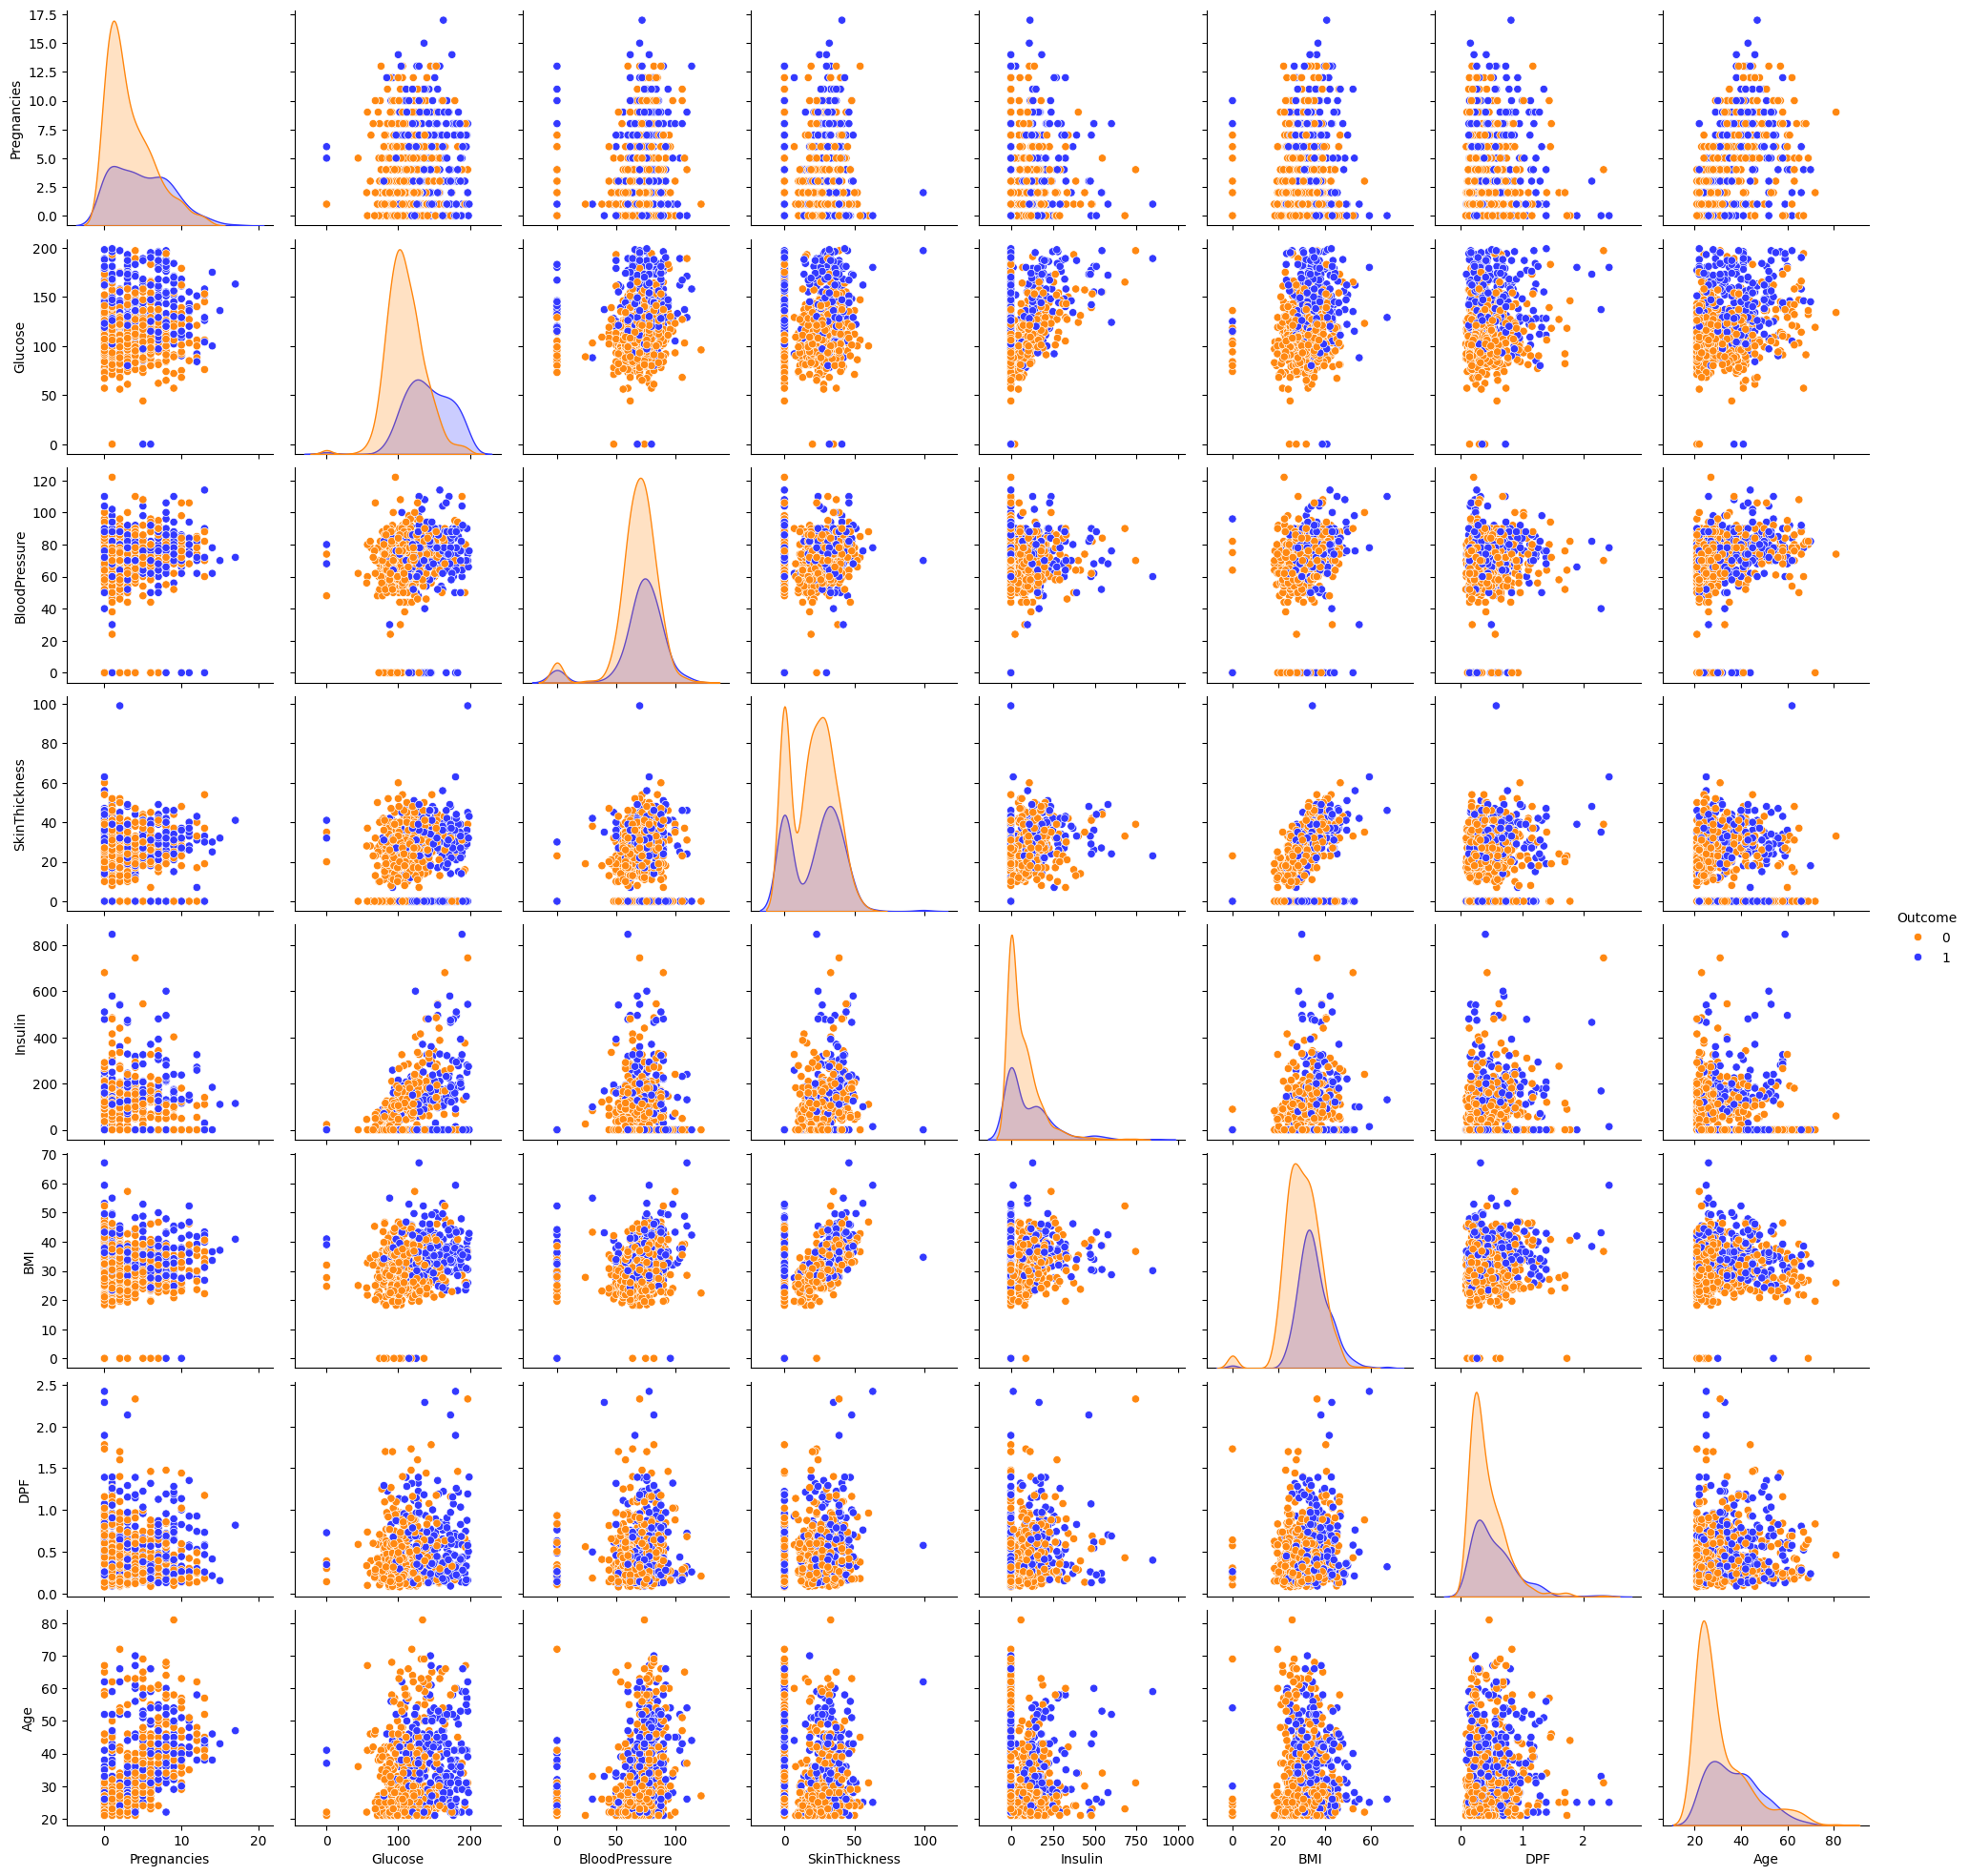

In [ ]:
sns.pairplot(df,hue='Outcome',palette = ["#ff8811","#3339FF"])
plt.show()

##### 3.2.4 Biểu đồ phân tán của Huyết áp so với Glucose so với Tuổi liên quan đến Kết quả

In [ ]:

# Tạo biểu đồ 3D với màu sắc mới
fig = px.scatter_3d(df, x='Age', y='Glucose', z='BloodPressure',
                     color='Outcome', size_max=18,
                     color_continuous_scale=["#3339FF", "#ff8811"])  # Màu sắc mới

# Cập nhật layout
fig.update_layout({"template": "plotly"})
fig.show()


##### 3.2.5 Biểu đồ phân tán của Glucose so với Insulin so với DPF liên quan đến Kết quả

In [ ]:
fig = px.scatter_3d(df, x='Glucose', y='Insulin', z='DPF',
              color='Outcome',size_max=18,color_continuous_scale=["#3339FF", "#ff8811"])
fig.update_layout({"template":"plotly"})
fig.show()

### 4. Data Preprocessing <a id=12></a>

#### 4.1 Kết luận từ EDA <a id=13></a>

1. Có rất ít giá trị ngoại lai trong tất cả các tính năng.
2. Không có mối tương quan tuyến tính rõ ràng giữa biến tính năng theo bản đồ nhiệt.
3. Insulin độ lệch phải mạnh sẽ cần chuẩn hóa
4. Đường cong phân phối của Glucose so với Kết quả cho thấy có ít người có mức Glucose cao hơn nhưng họ có nguy cơ mắc bệnh tiểu đường cao hơn.
5. BloodPressure nằm trong khoảng từ 40 đến 100 và có ít người mắc bệnh tiểu đường hơn trong phạm vi này.
6. Trong phạm vi Mang thai, phụ nữ có lượng glucose cao mắc bệnh tiểu đường.
7. Khi Insulin tăng và Glucose tăng, nguy cơ mắc bệnh tiểu đường sẽ cao hơn.
8. Khi BMI tăng và Glucose tăng, nguy cơ mắc bệnh tiểu đường sẽ cao hơn.
9. Chỉ riêng Tuổi không thực sự là chỉ số của bệnh tiểu đường.
10. Những người trung niên có mức Glucose cao và mức Huyết áp cao có nguy cơ mắc bệnh tiểu đường cao hơn, điều này cũng khá trực quan.

#### 4.2 Loại bỏ giá trị ngoại lệ <a id=14></a>

##### 4.2.1 KÍch thước dữ liệu trước loại bỏ

In [ ]:
print(df.shape)

(768, 9)


#### In ra số lượng giá trị bằng 0

In [ ]:
# In ra số lượng giá trị bằng 0 cho các cột khác nhau
print(df[df['BloodPressure'] == 0].shape[0])
print(df[df['Glucose'] == 0].shape[0])
print(df[df['SkinThickness'] == 0].shape[0])
print(df[df['Insulin'] == 0].shape[0])
print(df[df['BMI'] == 0].shape[0])

# Thay thế các giá trị 0 bằng giá trị trung bình hoặc trung vị của cột tương ứng
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
# Thay thế giá trị 0 trong cột Đường huyết bằng giá trị trung bình của cột vì dữ liệu này có phân phối chuẩn (normal distribution)

df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
# Thay thế giá trị 0 trong cột Huyết áp bằng giá trị trung bình của cột, vì dữ liệu có phân phối chuẩn (normal distribution)

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
# Thay thế giá trị 0 trong cột Độ dày da bằng giá trị trung vị vì dữ liệu bị lệch (skewed distribution)

df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
# Thay thế giá trị 0 trong cột Insulin bằng giá trị trung vị vì dữ liệu bị lệch (skewed distribution)

df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
# Thay thế giá trị 0 trong cột BMI bằng giá trị trung vị vì dữ liệu bị lệch (skewed distribution)


35
5
227
374
11


##### 4.2.2 Loại bỏ các giá trị ngoại lệ

In [ ]:

# Hàm loại bỏ ngoại lệ dựa trên phương pháp IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Loại bỏ ngoại lệ trong các cột liên quan
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pregnancies', 'DPF', 'Age']

for col in columns_to_clean:
    df = remove_outliers_iqr(df, col)

# Xem lại dữ liệu sau khi loại bỏ ngoại lệ
print(df.describe())
print(f"Shape of dataset: {colored(df.shape)}")


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   615.000000  615.000000     615.000000     615.000000  615.000000   
mean      3.765854  117.166622      71.451188      25.970732   69.469106   
std       3.197689   28.080612      10.679309       7.409110   55.977833   
min       0.000000   44.000000      44.000000      10.000000   15.000000   
25%       1.000000   97.000000      64.000000      23.000000   30.500000   
50%       3.000000  113.000000      70.000000      23.000000   30.500000   
75%       6.000000  131.500000      78.000000      31.000000  100.000000   
max      13.000000  196.000000     104.000000      45.000000  250.000000   

              BMI         DPF         Age     Outcome  
count  615.000000  615.000000  615.000000  615.000000  
mean    31.500325    0.414332   32.065041    0.308943  
std      6.098350    0.236435   10.413706    0.462434  
min     18.200000    0.078000   21.000000    0.000000  
25%     27.150000    0.236000   24.

#### 4.3 Xử lý độ lệch <a id=15></a>

##### 4.3.1 Kiểm tra sự phân bố

Skewness of each column:
Glucose          0.666128
BloodPressure    0.145089
SkinThickness    0.463875
Insulin          1.291940
BMI              0.248139
Pregnancies      0.822560
DPF              0.868887
Age              1.014960
dtype: float64


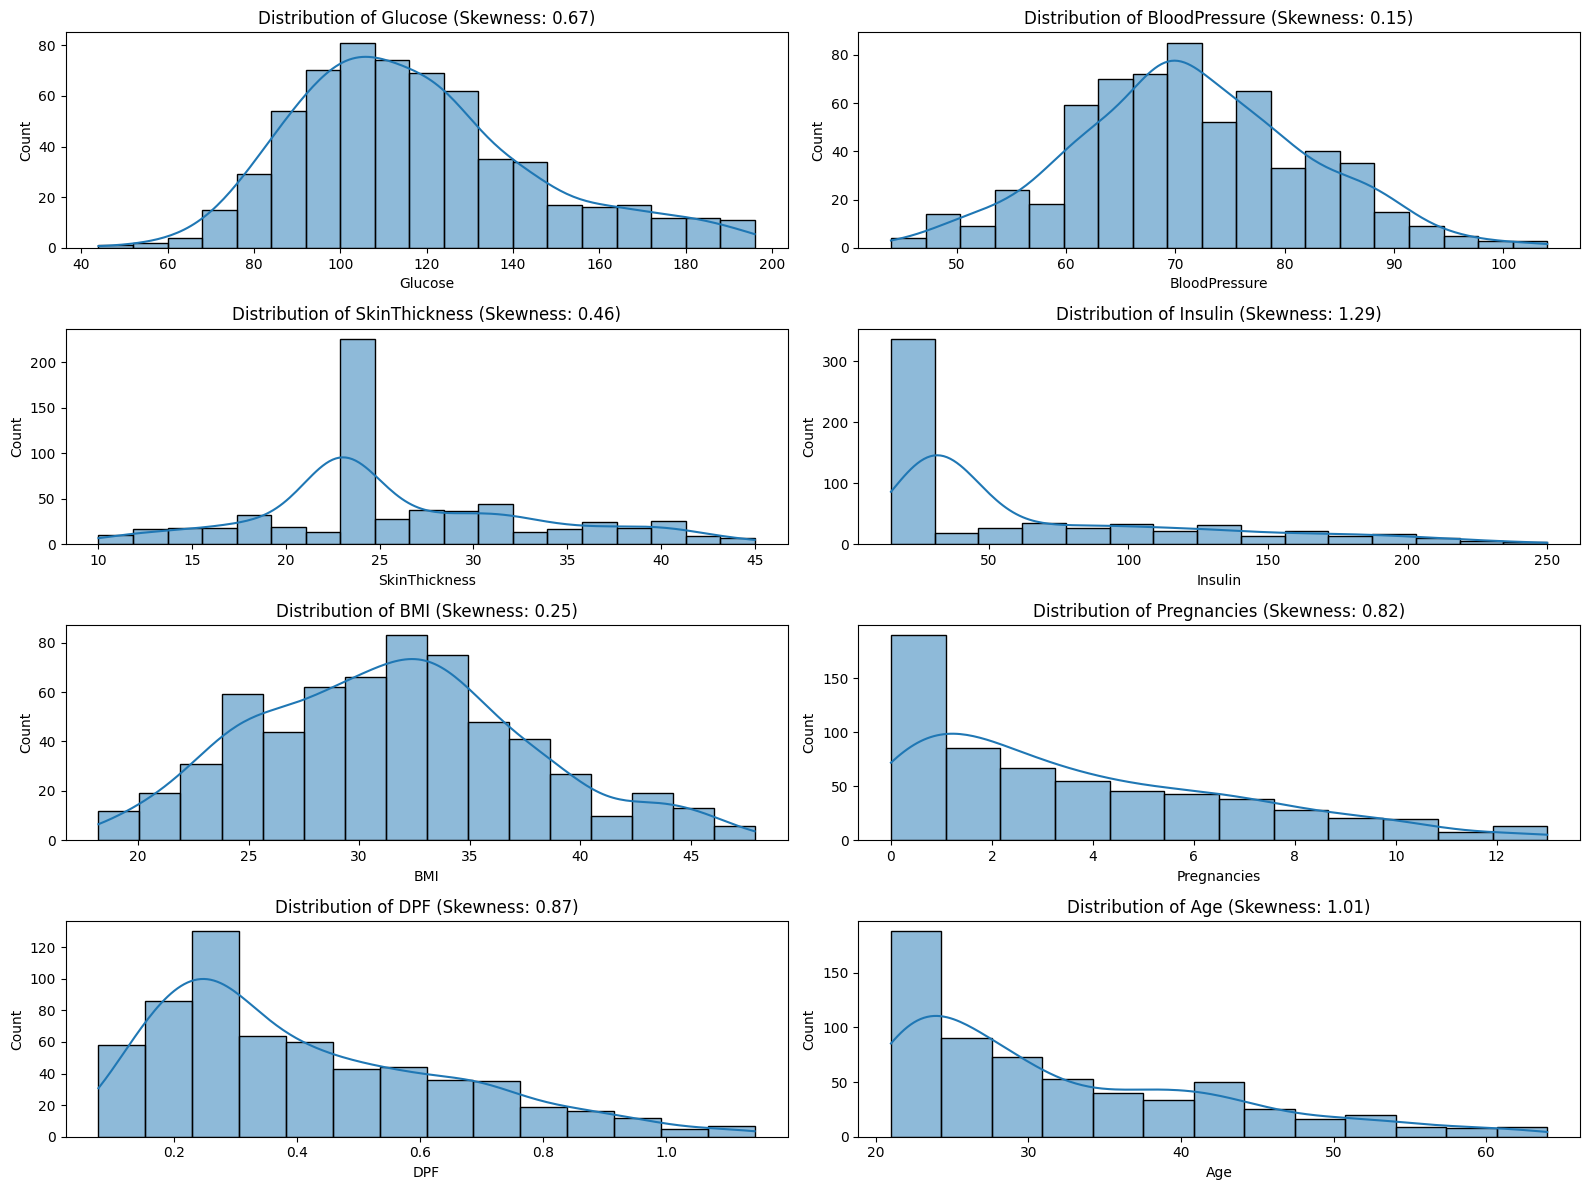

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kiểm tra độ lệch của từng cột
skewness = df[columns_to_clean].skew()

# In ra kết quả độ lệch
print("Skewness of each column:")
print(skewness)

# Vẽ biểu đồ phân phối để trực quan hóa độ lệch
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns_to_clean, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col} (Skewness: {round(skewness[col], 2)})")

plt.tight_layout()
plt.show()


##### 4.3.2 Loại bỏ độ lệch bằng cách sử dụng hàm logarit và kiểm tra lại phân phối

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Khởi tạo PowerTransformer
pt = PowerTransformer()

# Danh sách các cột cần chuẩn hóa
columns_to_normalize = ['Glucose', 'Insulin', 'Pregnancies', 'DPF', 'Age']

# Chỉ chuẩn hóa các cột có độ lệch lớn hơn 0.8
for col in columns_to_normalize:
    if df[col].skew() > 0.8:
        df[col] = pt.fit_transform(df[[col]])

#### 4.4 Chuẩn bị dữ liệu <a id=16></a>

In [ ]:
# Nhập thư viện scaler
from sklearn.preprocessing import StandardScaler

# Tạo một bản sao của DataFrame
df1 = df.copy()  # Sử dụng copy() để đảm bảo df1 là một bản sao độc lập

# Lấy danh sách các cột
col_cols = list(df1.columns)

# Loại bỏ biến mục tiêu khỏi danh sách các cột
col_cols.pop()  # Loại bỏ cột 'Outcome' ra khỏi danh sách cột

# Tách các đặc trưng và biến mục tiêu
X = df1.drop(['Outcome'], axis=1)  # Tạo biến X chứa các đặc trưng
y = df1[['Outcome']]  # Tạo biến y chứa biến mục tiêu

# Khởi tạo scaler
scaler = StandardScaler()

# Chuyển đổi dữ liệu trong X bằng cách chuẩn hóa
X[col_cols] = scaler.fit_transform(X[col_cols])  # Chuẩn hóa các cột đặc trưng

# In ra 5 dòng đầu tiên của X
print("5 dòng đầu tiên của X là")
X.head()


5 dòng đầu tiên của X là


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,0.841059,1.098925,0.051432,1.219663,-0.810131,0.344582,1.024830,1.487279
1,-0.858687,-1.146442,-0.510859,0.409190,-0.810131,-0.804203,-0.065494,0.216515
2,1.237999,2.346351,-0.698290,-0.401283,-0.810131,-1.345774,1.153975,0.324018
3,-0.858687,-1.003879,-0.510859,-0.401283,1.015891,-0.558035,-1.252404,-1.466480
5,0.607540,-0.041579,0.238863,-0.401283,-0.810131,-0.968316,-0.991981,0.101363


### 5. Modeling <a id=17></a>

#### 5.1 Packages <a id=18></a>

In [ ]:
!pip install scikit-optimize


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

# Base Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Ensembling and Boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyper-parameter tuning
# from functools import partial
# from skopt import gp_minimize
# from skopt import space
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

#### 5.2 Chia tập dữ liệu với tập train 80% <a id=19></a>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)
print(f"The shape of X_train is      {colored(X_train.shape,'yellow')}")
print(f"The shape of X_test is       {colored(X_test.shape,'yellow')}")
print(f"The shape of y_train is      {colored(y_train.shape,'yellow')}")
print(f"The shape of y_test is       {colored(y_test.shape,'yellow')}")

The shape of X_train is      (492, 8)
The shape of X_test is       (123, 8)
The shape of y_train is      (492, 1)
The shape of y_test is       (123, 1)


#### 5.3 Base Modeling <a id=20></a>

##### 5.3.1 Đào tạo dữ liệu bằng các mô hình cơ sở

In [ ]:

from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the models to evaluate
models = [
    ('SVC', SVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('LogisticRegression', LogisticRegression()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier()),
]

# Evaluate each model and print accuracy scores
print("\nThe accuracy scores of the models are:")
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: {accuracy:.4f}")


The accuracy scores of the models are:
SVC: 0.7886
DecisionTreeClassifier: 0.7236
LogisticRegression: 0.7724
RandomForestClassifier: 0.7967
GradientBoostingClassifier: 0.7317
XGBoost: 0.7561


#### 5.4 Hyperparameter tuning using GridSearchCV <a id=21></a>

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Tạo mô hình RandomForestClassifier
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

# Use curly braces to create the dictionary instead of the dict() constructor.
grid = {
    'n_estimators': n_estimators,
    'max_features': max_features
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

best_model = grid_search.fit(X_train, y_train)


# In ra các tham số tốt nhất
print("Best parameters:", grid_search.best_params_)

# Đánh giá độ chính xác của mô hình tốt nhất
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Best parameters: {'max_features': 'log2', 'n_estimators': 1800}
Accuracy: 0.7804878048780488


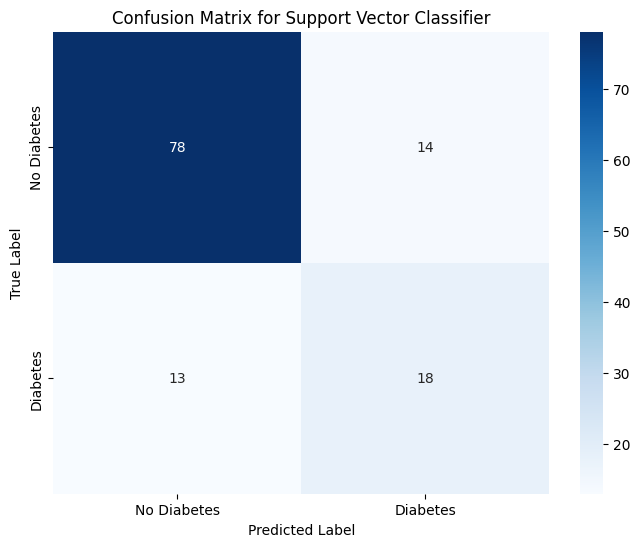

In [ ]:

# Tính toán ma trận nhầm lẫn

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix for Support Vector Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85        92
           1       0.56      0.58      0.57        31

    accuracy                           0.78       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.78      0.78      0.78       123



In [ ]:
# Lưu mô hình vào Google Drive
import pickle

model_filename = '/content/drive/MyDrive/Diabetes_Prediction/rf_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Mô hình đã được lưu vào: {model_filename}")

Mô hình đã được lưu vào: /content/drive/MyDrive/Diabetes_Prediction/rf_model.pkl


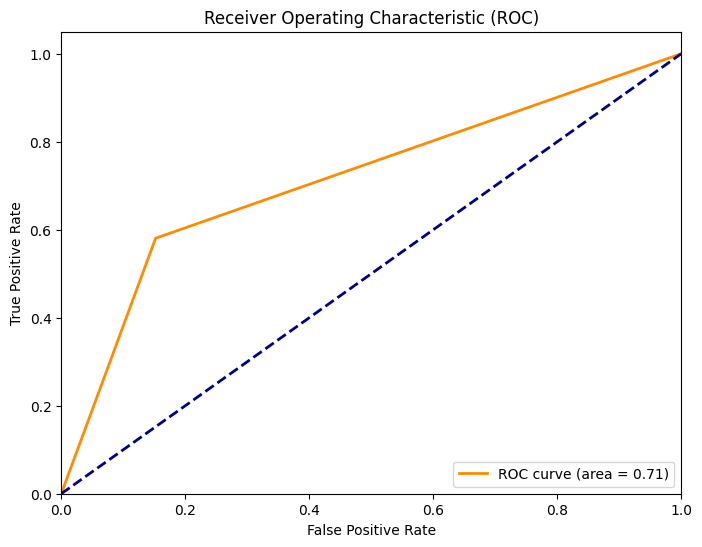

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score


# Số lượng fold
num_folds = 10

# Thực hiện kiểm định chéo
cv_scores = cross_val_score(model, X, y, cv=num_folds, scoring='accuracy')

# In ra độ chính xác của từng fold
print("Cross-validation scores for each fold:", cv_scores)

# Tính và in ra độ chính xác trung bình và độ lệch chuẩn
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))


Cross-validation scores for each fold: [0.70967742 0.85483871 0.74193548 0.70967742 0.77419355 0.73770492
 0.81967213 0.80327869 0.70491803 0.7704918 ]
Mean accuracy: 0.7626388154415653
Standard deviation: 0.04857183858207322


In [ ]:
y_predict = best_model.predict([[4,	97,	60,	23,	0,	28.2,	0.443,	22]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")




[0]
Non Diabetic


In [ ]:
y_predict = best_model.predict([[9,	122,	56,	0,	0,	33.3,	1.114,	33]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")


[1]
Diabetic


#### Streamlit

In [ ]:

%%writefile /content/drive/MyDrive/Diabetes_Prediction/app.py

import streamlit as st
import pickle


# Load the saved model
model_filename = '/content/drive/MyDrive/Diabetes_Prediction/rf_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

def main():
    st.sidebar.header("Diabetes Risk Prediction")

    # Input number for user data
    Pregnancies = st.number_input("Input Your Number of Pregnancies", min_value=0, max_value=16, step=1)
    Glucose = st.number_input("Input your Glucose", min_value=74, max_value=200, step=1)
    BloodPressure = st.number_input("Input your Blood Pressure", min_value=30, max_value=130, step=1)
    SkinThickness = st.number_input("Input your Skin Thickness", min_value=0, max_value=100, step=1)
    Insulin = st.number_input("Input your Insulin", min_value=0, max_value=400, step=1)
    BMI = st.number_input("Input your BMI", min_value=14.0, max_value=60.0, step=0.1, format="%.1f")
    DPF = st.number_input("Input your Diabetes Pedigree Function", min_value=0.000, max_value=6.000, step=0.001, format="%.3f")
    Age = st.number_input("Input your Age", min_value=0, max_value=100, step=1)

    # Prepare the inputs for the model
    inputs = pd.DataFrame({
        'Pregnancies': [Pregnancies],
        'Glucose': [Glucose],
        'BloodPressure': [BloodPressure],
        'SkinThickness': [SkinThickness],
        'Insulin': [Insulin],
        'BMI': [BMI],
        'DPF': [DPF],
        'Age': [Age]
    })

    if st.button('Predict'):
        # Make prediction
        result = loaded_model.predict(inputs)
        probabilities = loaded_model.predict_proba(inputs)

        if result[0] == 0:
            st.write("Low risk of diabetes")
        else:
            st.write("Higher risk of diabetes")

        st.subheader('Prediction Probabilities')
        st.write(f"Probability of Non-Diabetic: {probabilities[0][0]:.2f}")
        st.write(f"Probability of Diabetic: {probabilities[0][1]:.2f}")

        st.subheader('Data')
        st.write(inputs)

if __name__ == '__main__':
    main()


Overwriting /content/drive/MyDrive/Diabetes_Prediction/app.py


In [ ]:
!npm install localtunnel


up to date, audited 23 packages in 643ms

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!streamlit run /content/drive/MyDrive/Diabetes_Prediction/app.py &>/content/logs.txt &


In [ ]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com


34.28.225.144
your url is: https://ripe-symbols-stare.loca.lt
